<a href="https://colab.research.google.com/github/seunghee0518/python_colab/blob/main/sklearn_clustering(kmeans_DBSCAN_with_PCA)_%5Bdata_sales%2Ccredit_card%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kmeans clustering[data : sales]
* sales.csv : Customer data from wholesale distributors
* Channel(categorical) : customer channel or retail distributors channel
* Region(catergorical) : customer region
* Fresh(continuous) : Annual Duration(연간 지출) of Fresh Products
* Milk(continuous) : Annual Duration of Dairy Product(유제품)
* Grocery(countinuous) : Annual Duration of Groceries(식료품)
* Frozen(countinuous) : Annual Duration of Frozen Foods
* Detergents_Paper(countinuous) : Annual Duration of Detergents & Paper Products(세제&종이)
* Delicassen(countinuous) :Annual Duration of PrePared Food(조제식품) 

In [30]:
#import libray
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [31]:
#read data
sales_url = 'https://raw.githubusercontent.com/gilbutITbook/080263/master/chap3/data/sales%20data.csv'
sales = pd.read_csv(sales_url)
sales.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [32]:
# classificate data
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozed', 'Detergents_paper', 'Delicassen']

#categorical -> Binary(dummy, 0 or 1)
for col in categorical_features : 
  dummies = pd.get_dummies(sales[col], prefix = col)
  sales = pd.concat([sales, dummies], axis = 1)
  sales.drop(col, axis = 1, inplace = True)

sales.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [33]:
#scaling continuous features
mms = MinMaxScaler()
mms.fit(sales)
scl_sales = mms.transform(sales)

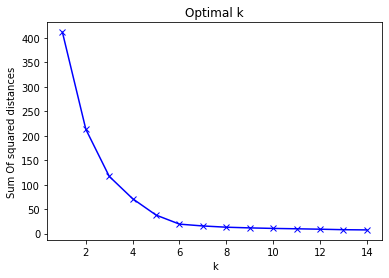

In [34]:
#extract proper K values
SSD = [] #Sum of squared distance
K = range(1, 15)
for k in K :
  km = KMeans(n_clusters= k)
  km = km.fit(scl_sales)
  SSD.append(km.inertia_)
plt.plot(K, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum Of squared distances')
plt.title('Optimal k')
plt.show()

# DBSCAN with PCA[data:credit_card]

In [35]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [36]:
#data
credit_url = 'https://raw.githubusercontent.com/gilbutITbook/080263/master/chap3/data/credit%20card.csv'
X = pd.read_csv(credit_url)
X = X.drop('CUST_ID', axis = 1) #drop columns-CUST_ID
X.fillna(method = 'ffill', inplace = True) # fill NA 
print(X.head())

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


In [37]:
#preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # average =0 SD = 1, 
X_normalized = normalize(X_scaled) # 정규분포 따름
X_normalized = pd.DataFrame(X_normalized)

In [38]:
#Reduce to 2-dimension as PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544826
2  0.330633  0.268878
3 -0.481656 -0.097609
4 -0.563512 -0.482506


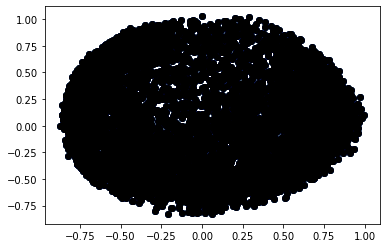

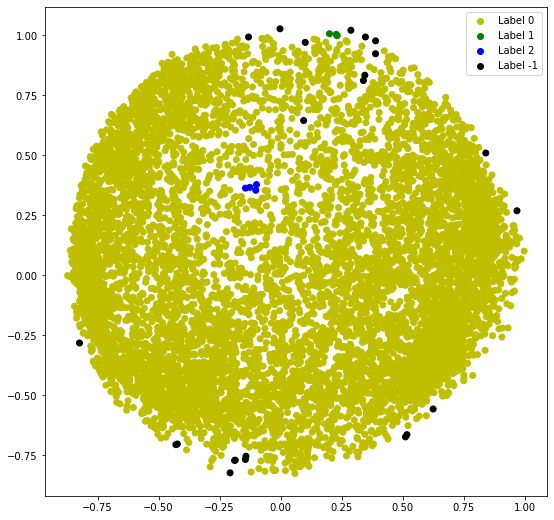

In [39]:
#create DBSCAN Model : minPts = 3
db_m3 = DBSCAN(eps = 0.0375, min_samples= 3).fit(X_principal)
labels = db_m3.labels_ # label of the assigned cluster

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels] #create color vector

#make up legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'k');

plt.figure(figsize = (9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

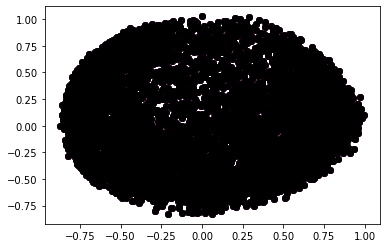

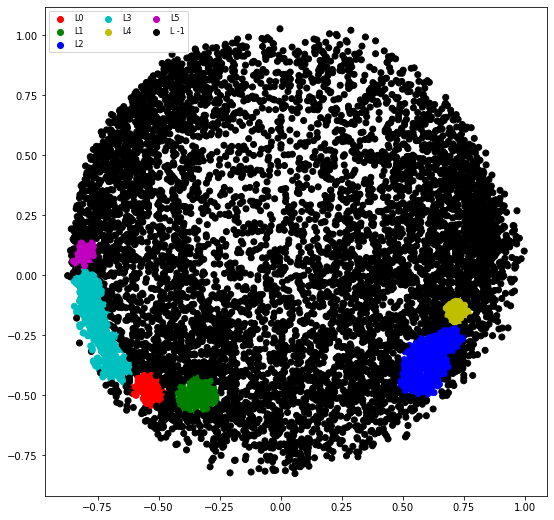

In [40]:
#minPts : 3 -> 50
db_m50 = DBSCAN(eps = 0.0375, min_samples=50).fit(X_principal)
labels2 = db_m50.labels_

clr2 = {}
clr2[0] = 'r'
clr2[1] = 'g'
clr2[2] = 'b'
clr2[3] = 'c'
clr2[4] = 'y'
clr2[5] = 'm'
clr2[-1] = 'k'

cvec2 = [clr2[label] for label in labels2]

r2 = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = clr2[0])
g2 = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = clr2[1])
b2 = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = clr2[2])
c2 = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = clr2[3])
y2 = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = clr2[4])
m2 = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = clr2[5])
k2 = plt.scatter(X_principal['P1'], X_principal['P2'], marker = 'o', color = clr2[-1])

plt.figure(figsize = (9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec2)
plt.legend((r2, g2, b2, c2, y2, m2, k2),
           ('L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L -1'),
           scatterpoints = 1,
           loc = 'upper left',
           ncol = 3,
           fontsize = 8)
plt.show()

* 적절한 minPts값을 정하는 것이 중요
* 즉, 최적의 성능을 내려면 하이퍼파라미터(min_samples)를 이용한 모델튜닝이 중요